uso mobilenetV3 per hiragana/kanjji

uso CNN normale per hiragana

faccio confonto

metto file su github

In [1]:
!pip install tensorflow-datasets

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import tensorflow_datasets as tfds

In [2]:
dataset_path = 'C:/Users/andma/OneDrive/Documenti/hiragana images/hiragana_images'

train_data = tf.keras.utils.image_dataset_from_directory(dataset_path,
                                                                color_mode='grayscale',
                                                                labels = 'inferred',
                                                                batch_size=32,
                                                                image_size=(84, 84),
                                                                seed=1,
                                                                validation_split=0.2,
                                                                subset='training')

Found 2000 files belonging to 50 classes.
Using 1600 files for training.


In [3]:
val_data = tf.keras.utils.image_dataset_from_directory(dataset_path,
                                                                color_mode='grayscale',
                                                                labels = 'inferred',
                                                                batch_size=32,
                                                                image_size=(84, 84),
                                                                seed=1,
                                                                validation_split=0.2,
                                                                subset='validation')

Found 2000 files belonging to 50 classes.
Using 400 files for validation.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Rescaling

In [5]:
img_height = 84
img_width = 84

filters = 32
num_classes = 50
dropout_coeff = 0.6

model = Sequential()

##### Rescaling layer
model.add(Rescaling(1./255, input_shape=(img_height, img_width, 1)))

##### First convolution layer
model.add(Conv2D(filters, (3,3)))  #, input_shape = x_trainr.shape[1:]
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(dropout_coeff, input_shape=(39, 39)))

##### Second convolution layer
model.add(Conv2D(filters, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(dropout_coeff, input_shape=(17, 17)))

##### Third convolution layer
model.add(Conv2D(filters, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(dropout_coeff, input_shape=(8, 8)))

##### Fully Connected Layer #1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

##### Fully Connected Layer #2
model.add(Dense(64))
model.add(Activation("relu"))

##### Last Fully Connected Layer, 50 Outputs
model.add(Dense(num_classes))
model.add(Activation("softmax"))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 84, 84, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 82, 82, 32)        320       
                                                                 
 activation (Activation)     (None, 82, 82, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 41, 41, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 41, 41, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 39, 39, 32)        9248      
                                                        

In [7]:
##### Compiling the Model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [9]:
epochs = 15

history = model.fit(train_data, validation_data=val_data, epochs=epochs)

Epoch 1/15
50/50 [==============================] - 7s 138ms/step - loss: 2.2571 - accuracy: 0.4006 - val_loss: 1.7026 - val_accuracy: 0.6875
Epoch 2/15
50/50 [==============================] - 6s 126ms/step - loss: 1.1509 - accuracy: 0.6700 - val_loss: 0.9695 - val_accuracy: 0.7525
Epoch 3/15
50/50 [==============================] - 6s 127ms/step - loss: 0.8090 - accuracy: 0.7569 - val_loss: 0.7507 - val_accuracy: 0.8325
Epoch 4/15
50/50 [==============================] - 7s 130ms/step - loss: 0.6103 - accuracy: 0.8050 - val_loss: 0.6338 - val_accuracy: 0.8625
Epoch 5/15
50/50 [==============================] - 6s 125ms/step - loss: 0.4683 - accuracy: 0.8537 - val_loss: 0.5183 - val_accuracy: 0.8650
Epoch 6/15
50/50 [==============================] - 7s 129ms/step - loss: 0.3618 - accuracy: 0.8819 - val_loss: 0.4122 - val_accuracy: 0.8975
Epoch 7/15
50/50 [==============================] - 6s 125ms/step - loss: 0.3521 - accuracy: 0.8869 - val_loss: 0.3398 - val_accuracy: 0.9000
Epoch 

In [10]:
print(history.params)

{'verbose': 1, 'epochs': 15, 'steps': 50}


In [11]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [12]:
print('loss = ', history.history['loss'][-1])
print('accuracy = ', history.history['accuracy'][-1])
print('val_loss = ', history.history['val_loss'][-1])
print('val_accuracy = ', history.history['val_accuracy'][-1])

loss =  0.14935161173343658
accuracy =  0.9487500190734863
val_loss =  0.21996533870697021
val_accuracy =  0.9300000071525574


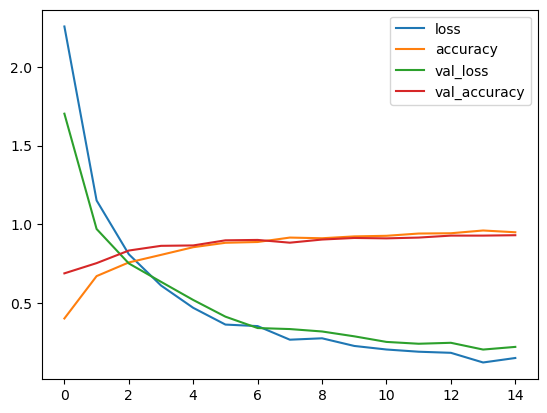

In [13]:
epoch_num = list(range(0, epochs))
plt.plot(epoch_num, history.history['loss'], label = 'loss')
plt.plot(epoch_num, history.history['accuracy'], label = 'accuracy')
plt.plot(epoch_num, history.history['val_loss'], label = 'val_loss')
plt.plot(epoch_num, history.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()